# The Spark Foundation - GRIP - Data Science and Business Analytics

## Task 1 : Prediction Using Supervised ML

## Author : Pratiyush Raj

### Predict the precentage of an student based on the no. of study hours.

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Import Dataset

df= pd.read_csv('data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

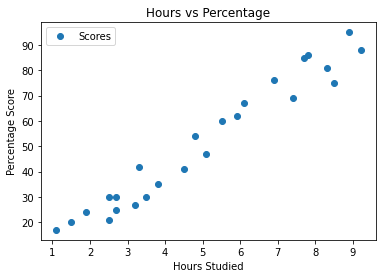

In [6]:
# Ploting the distribution of scores

df.plot(x= 'Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


In [7]:
# Correlation

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


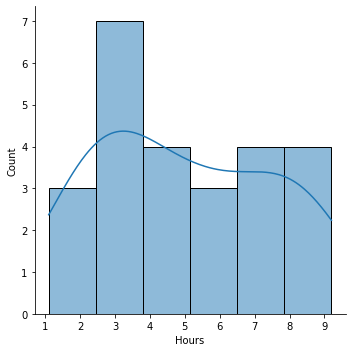

In [8]:
sns.displot(df['Hours'], kde=True)

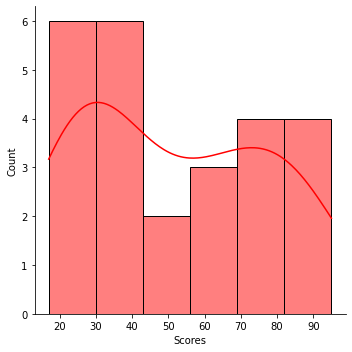

In [9]:
sns.displot(df['Scores'], color='red', kde=True)

In [10]:
# Spliting the data set into independent and dependent variable

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
# Spliting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [12]:
# Model training

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# predicting the rersult

y_pred = lr.predict(X_test)

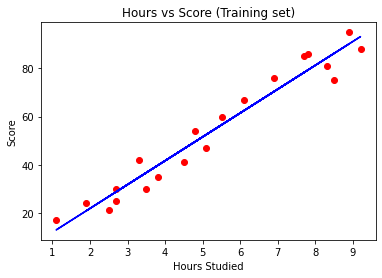

In [14]:
# Visualizing the training set result

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()


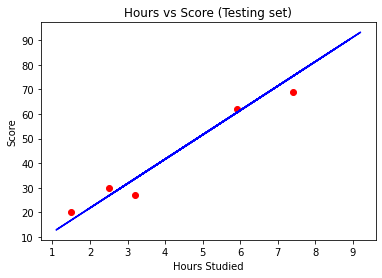

In [15]:
# Visualizing the test set result

plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Hours vs Score (Testing set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [16]:
pred  = lr.predict(X_test)
pd.DataFrame({'Actual_Value':y_test, 'Predicted_Value':pred})

,Actual_Value,Predicted_Value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
# Predicting the result

prediction = lr.predict([[9.5]])
prediction

array([96.16939661])

In [18]:
h=9.25
s=lr.predict([[h]])
print('If student studies for {} hours per day he/she is likely to score {}%'.format(h,*s))

If student studies for 9.25 hours per day he/she is likely to score 93.69173248737538%


In [19]:
# checking the accuracy of model

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356

## Thus, The predicted score for a student who studies for 9.25 hrs/day is 93.69

# Thank You